In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

##### **Load Dataset**

In [4]:
cust_df=pd.read_csv("Data/Customers.csv")
trans_df=pd.read_csv("Data/Transactions.csv")

##### **Feature Engineering**

In [6]:
customer_feat=trans_df.groupby('CustomerID').agg(
    total_spend=("TotalValue","sum"),
    total_transactions=("TransactionID","count"),
    avg_spend=("TotalValue","mean")
).reset_index()

In [8]:
customer_data=cust_df.merge(customer_feat,on='CustomerID',how='inner')

In [9]:
customer_data

,CustomerID,CustomerName,Region,SignupDate,total_spend,total_transactions,avg_spend
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,5,670.904000
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,4,465.685000
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,4,681.345000
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,8,669.360000
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,3,678.080000
...,...,...,...,...,...,...,...
194,C0196,Laura Watts,Europe,2022-06-07,4982.88,4,1245.720000
195,C0197,Christina Harvey,Europe,2023-03-21,1928.65,3,642.883333
196,C0198,Rebecca Ray,Europe,2022-02-27,931.83,2,465.915000
197,C0199,Andrea Jenkins,Europe,2022-12-03,1979.28,4,494.820000


##### **Selecting Features for clustering**

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
features=['total_spend','total_transactions','avg_spend']
scaler=StandardScaler()
customer_data_scaled=scaler.fit_transform(customer_data[features])

##### **Finding the optimal number of clusters using Davies-Bouldin Index**

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [13]:
db_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(customer_data_scaled)
    db_index = davies_bouldin_score(customer_data_scaled, labels)
    db_scores.append(db_index)
    print(f"DB Index for {k} clusters: {db_index:.4f}")

DB Index for 2 clusters: 1.0072
DB Index for 3 clusters: 0.9578
DB Index for 4 clusters: 1.0604
DB Index for 5 clusters: 0.8525
DB Index for 6 clusters: 0.8694
DB Index for 7 clusters: 0.8553
DB Index for 8 clusters: 0.9125
DB Index for 9 clusters: 0.8848
DB Index for 10 clusters: 0.8630


##### **Choose the best cluster count with the lowest DB Index**

In [14]:
optimal_k = k_values[np.argmin(db_scores)]
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_data['cluster'] = kmeans.fit_predict(customer_data_scaled)

In [19]:
optimal_k

5

##### **Visualization: DB Index vs Number of Clusters**

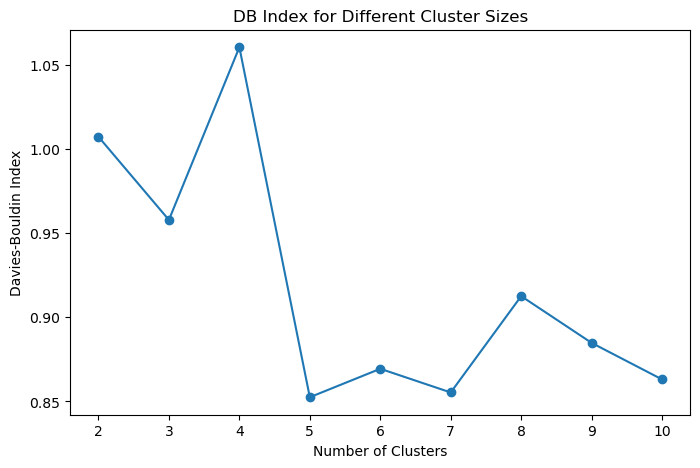

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, db_scores, marker='o', linestyle='-')
plt.xlabel("Number of Clusters")
plt.ylabel("Davies-Bouldin Index")
plt.title("DB Index for Different Cluster Sizes")
plt.show()

##### **Visualization: Customer Clusters**

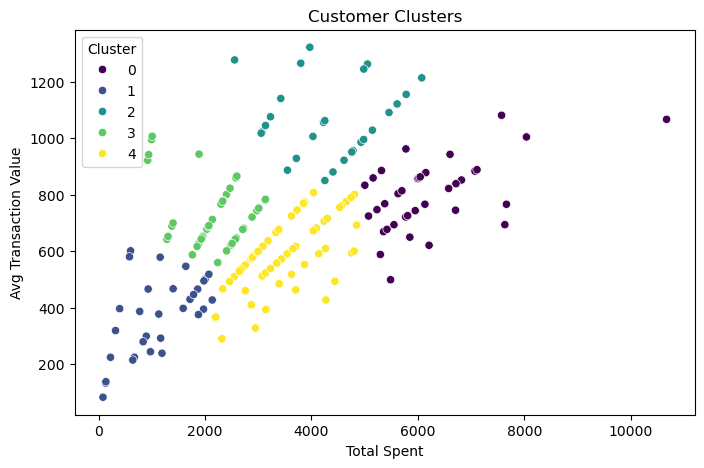

In [18]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=customer_data["total_spend"], y=customer_data["avg_spend"], hue=customer_data["cluster"], palette="viridis")
plt.xlabel("Total Spent")
plt.ylabel("Avg Transaction Value")
plt.title("Customer Clusters")
plt.legend(title="Cluster")
plt.show()
